In [4]:
import numpy as np
from math import pi
from numpy import cos, sin, rad2deg
from skimage import io
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import sobel, sobel_h, sobel_v
from skimage.feature import canny,corner_harris, corner_peaks
from skimage.transform import hough_line, hough_line_peaks, probabilistic_hough_line
# from matplotlib.pyplot import figure, imshow, title, subplot, plot, show, plot, xlabel, ylabel, axis
from matplotlib.pyplot import figure, imshow, title, subplot, plot, show, plot, xlabel, ylabel, axis, colorbar, clim,Circle




import time

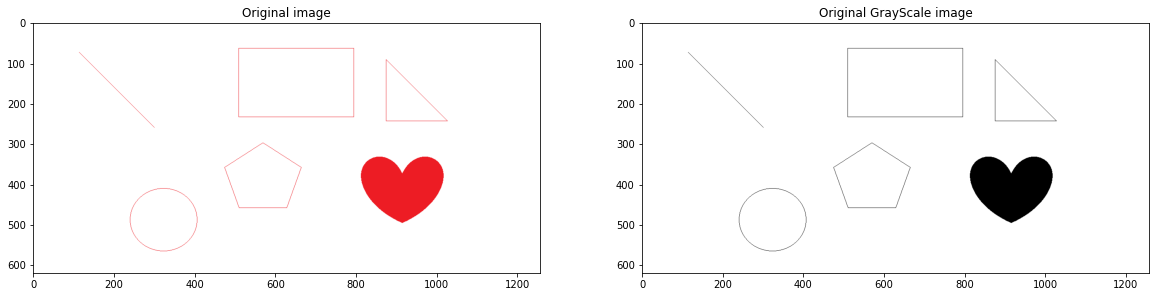

In [49]:
# img = io.imread('riv1.png')
img = io.imread('proj5.png')


figure(figsize=(20,17))

subplot(1,2,1)
title("Original image")
imshow(img, cmap="gray")

if(len(img.shape) == 3):
    img = rgb2gray(img)

subplot(1,2,2)
title("Original GrayScale image")
imshow(img, cmap="gray")

show()

[296 286 190 179 171 157 157 155 152 142 129 127] [-1.57079633 -1.57079633 -0.78539816  0.          0.         -0.76794487
 -1.57079633  0.         -0.78539816 -0.80285146 -1.57079633 -1.55334303] [-233.  -61.   30.  508.  795.  568. -243.  873.  555.  540. -458. -221.]


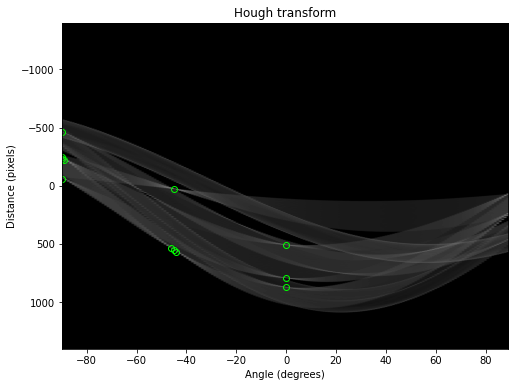

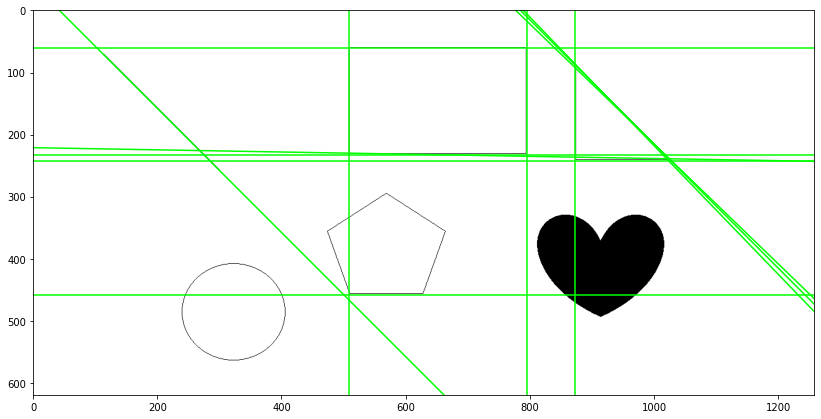

In [50]:
# print(y)

# img = img[2:img.shape[0]-2][2:img.shape[1]-2]
y = canny(img)
accumulator, angle, dist  = hough_line(y)

peaks, angles, dists = hough_line_peaks(accumulator, angle, dist, threshold=.1*accumulator.max(), num_peaks=12)
print(peaks, angles, dists)
axes = (rad2deg(angle[0]), rad2deg(angle[-1]), dist[-1], dist[0])

figure(figsize=(8,6))
imshow(accumulator**.5, cmap="gray", extent=axes, aspect="auto")
xlabel('Angle (degrees)')
ylabel('Distance (pixels)')
title("Hough transform")
plot(rad2deg(angles), dists, marker='o', markeredgecolor='lime', markerfacecolor="none", linestyle="none")
show()

M, N = img.shape

figure(figsize=(14,11))
imshow(img, cmap="gray")

for _, angle, dist in zip(peaks, angles, dists):
    if abs(_) <= 75:
        continue
    x0 = 0
    y0 = dist / (sin(angle)+0.00000001)
    x1 = N
    y1 = (dist - x1*cos(angle)) / (sin(angle)+0.00000001)
    
    plot((x0, x1), (y0, y1), color='lime')
    # for x,y in get_line(int(x0), int(y0), int(x1), int(y1)):
    #     img_straight[x,y] = 1

axis((0,N,M,0))
show()


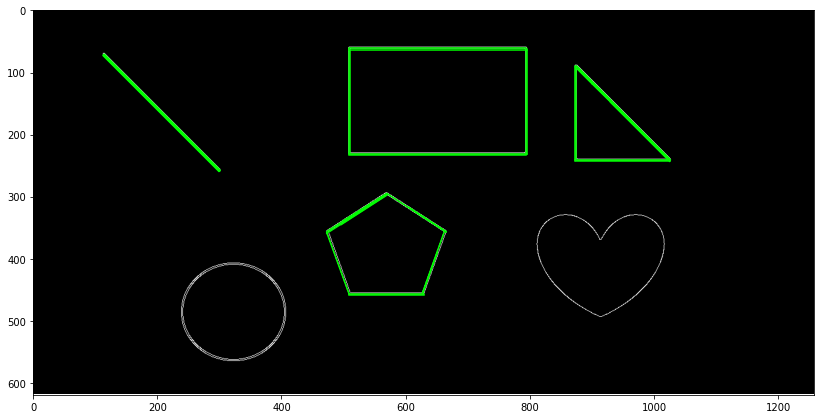

In [51]:
temp = canny(img)
N,M = temp.shape
lines = probabilistic_hough_line(temp, threshold=85, line_length=15, line_gap=3)
figure(figsize=(14,11))
imshow(temp, cmap="gray")
# print(lines[0])
# print(lines[0][0])
# print(lines[0][0][0])
for line in lines:
    p0, p1 = line
    plot((p0[0], p1[0]), (p0[1], p1[1]), color='lime')

axis((0,M,N,0))
show()